In [1]:
#importing all the important module which is used in given dataset
import pandas as pd,numpy as np,sklearn,matplotlib.pyplot as plt,seaborn as sb

In [2]:
#now loading the dataset by using read_csv() built in method of pandas library and converting into df object
csv_path = r'D:\ML_AUTOMOBILE_PROJECT\notebook\data\Automobile_data.csv'
seprator = ','
df = pd.read_csv(csv_path,sep=seprator)
#show top 5 records from df object
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
#to show random 5 records from df object achieve by using random() built in method of pandas library
df.sample(5)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
35,0,110,honda,gas,sedan,fwd,front,64.0,54.5,ohc,92,76,30,34,7295
170,2,134,toyota,gas,hardtop,rwd,front,65.6,52.0,ohc,146,116,24,30,11199
8,1,158,audi,gas,sedan,fwd,front,71.4,55.9,ohc,131,140,17,20,23875
52,1,104,mazda,gas,hatchback,fwd,front,64.2,54.1,ohc,91,68,31,38,6795
98,2,168,nissan,gas,hardtop,fwd,front,63.8,53.3,ohc,97,69,31,37,8249


In [4]:
#to show bottom 5 records from df object achieve by using tail() built in method of pandas library
df.tail()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470
204,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,19,25,22625


In [5]:
#to show the shape of df object achieve by using shape built in attributes of numpy library
df.shape

(205, 15)

In [6]:
#to show all the information about df object like nulls details,shape,size,memory consume,records so on
df.info()

#below result we can conclude showing non null exist in dataset but we cross different ways!!! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [7]:
#to show all the mathematical or statistical analysis about df object(specifically for numeric column achieve by using)
df.describe()

## conclusion
# symboling,height,highway_mpg column showing some +ve/-ve skewness bcoz of that outlier may exist
# on that cloumn bcoz of that error getting high and testing accuracy of model decrease

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


# now performing EDA on this given dataset

#step1) checking for any duplicate value exist or not in given df object

In [8]:
df.duplicated().sum()
#if exist then we used this syntax to remove the duplicate from dataset
df.drop_duplicates(subset=df.columns,ignore_index=True,inplace=True)

#again cross checking removed or not
df.duplicated().sum()

0

#step2) checking for null value exist or not in df object

In [9]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

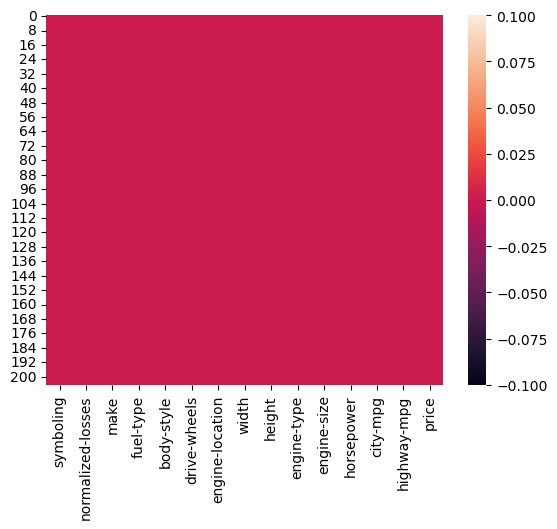

In [10]:
#visualizing the null value by using heatmap() built in method of seaborn module
sb.heatmap(df.isnull())
plt.show() #show method we used to hide the axis of graph that allocate by memory

#below result we can conclude no null will be exist in df object

In [11]:
#cross checking the null value by finding out each column dtype and comparing with those column record dtype 
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [12]:
df.head(5)

#below result we can conclude normalized-losses and horsepower column showing colm dtype object but records which is present 
#in that column showing numeric dtype its bcoz string special exist in that column (presecendence of string is higher)
#so we have to  replace string special character with null and changing its dtype 
#then filling the null value by according to dtype colm
#can be achieve by either by using conventional technique or by using to_numeric() built in method of pandas library

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


# replace string special character with null on normalized-losses and horsepower column

#using conventional technique either using map() and apply() built in function of pandas library

In [13]:
#to show in normalized-losses column what are the unique value present in it
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [14]:
#now repalcing '?' with null value using apply() built in method of pandas library
df['normalized-losses'] = df['normalized-losses'].apply(lambda x: x.replace('?',str(np.nan)))

In [15]:
#changing dtype from--->object to float so that no data will get loss in it
#we r using astype() built in method of pandas library
df['normalized-losses'] = df['normalized-losses'].astype('float')
df['normalized-losses'].dtypes

dtype('float64')

# horsepower column

In [16]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [17]:
#now repalcing '?' with null value using apply() built in method of pandas library
df['horsepower'] = df['horsepower'].map(lambda x: x.replace('?',str(np.nan)))

In [18]:
#changing dtype from--->object to float so that no data will get loss in it
#we r using astype() built in method of pandas library
df['horsepower'] = df['horsepower'].astype('float')
df['horsepower'].dtypes

dtype('float64')

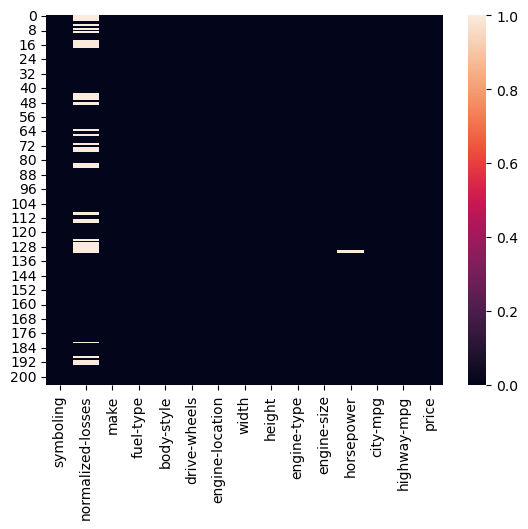

In [19]:
#visualizing the null value by using heatmap() built in method of seaborn module
sb.heatmap(df.isnull())
plt.show() #show method we used to hide the axis of graph that allocate by memory

In [20]:
#checking the % of null value present in each column
df.isnull().sum()/df.shape[0]*100

#if %of null value will be more than 50% we simply drop those column from df object 
#if %of null value <50% so filling the null value by mean/median/mode depending upon dtype of column

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
width                 0.00000
height                0.00000
engine-type           0.00000
engine-size           0.00000
horsepower            0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 0.00000
dtype: float64

# filling null value by mean/median/mode depending upon dtype

In [21]:
median = df['normalized-losses'].median()

In [22]:
df['normalized-losses'].fillna(median,axis=0,inplace=True)

In [23]:
df['normalized-losses'].isna().sum()

0

In [24]:
median_ = df['horsepower'].median()
median_

95.0

In [25]:
df['horsepower'].fillna(median_,axis=0,inplace=True)

In [26]:
df['horsepower'].isna().sum()

0

#again visualizing the null value 

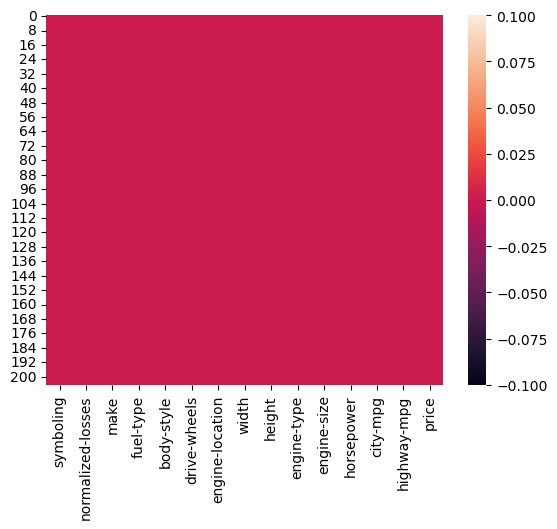

In [27]:
sb.heatmap(df.isnull())
plt.show() #show method we used to hide the axis of graph that allocate by memory

# stepx) checking for outlier present or not in given df object if exist then we drop those outliered datapoint from df object

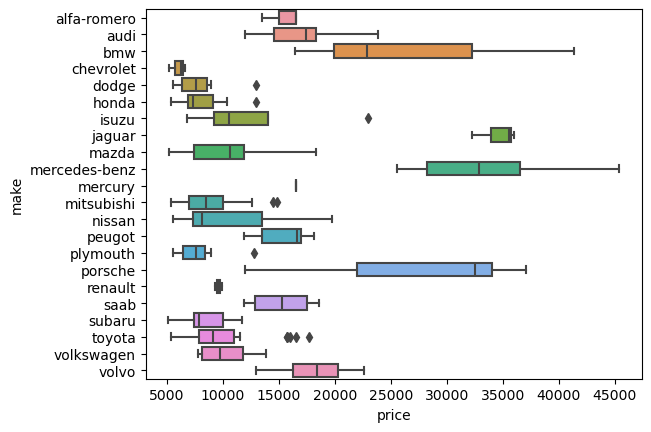

In [28]:
#outliers-->means we r measuring the dispersion of datapoint which is far away from upper and lower whisker
#those datapoint refered as outliers
#to visualize the outliers we used box-plot graph of seaborn library
#these graph is suitable if output variable is contineous numeric dtype column value !!


sb.boxplot(data=df,x='price',y='make') #price of car depend upon manufacturing company
plt.show()

#below result we can conclude following brand of car(such as dodge,honda,mitsubhishi..so on) showing outliers
#so we have to remove those outliers datapoint from dataset

#using conventional technique to remove outliers from datset

In [29]:
#finding first and third quantile-->quantile() built in method of pandas library
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(f"first_quantile: {q1}")
print(f"third_quantile: {q3}")

first_quantile: 7788.0
third_quantile: 16500.0


In [30]:
#calculating iqr
iqr = q3-q1
print(f"inter_quantile_range: {iqr}")

inter_quantile_range: 8712.0


In [31]:
#calculating upper and lower whisker or bound
lw = q1-1.5*iqr
uw = q3+1.5*iqr
print(f"lower bound: {lw}")
print(f"upper bound: {uw}")

lower bound: -5280.0
upper bound: 29568.0


In [32]:
#now applying condition to get all the outliers datapoint 
df[(lw>df['price'])|(uw<df['price'])]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
15,0,115.0,bmw,gas,sedan,rwd,front,66.9,55.7,ohc,209,182.0,16,22,30760
16,0,115.0,bmw,gas,sedan,rwd,front,67.9,53.7,ohc,209,182.0,16,22,41315
17,0,115.0,bmw,gas,sedan,rwd,front,70.9,56.3,ohc,209,182.0,15,20,36880
47,0,145.0,jaguar,gas,sedan,rwd,front,69.6,52.8,dohc,258,176.0,15,19,32250
48,0,115.0,jaguar,gas,sedan,rwd,front,69.6,52.8,dohc,258,176.0,15,19,35550
49,0,115.0,jaguar,gas,sedan,rwd,front,70.6,47.8,ohcv,326,262.0,13,17,36000
70,-1,93.0,mercedes-benz,diesel,sedan,rwd,front,71.7,56.3,ohc,183,123.0,22,25,31600
71,-1,115.0,mercedes-benz,gas,sedan,rwd,front,71.7,56.5,ohcv,234,155.0,16,18,34184
72,3,142.0,mercedes-benz,gas,convertible,rwd,front,70.5,50.8,ohcv,234,155.0,16,18,35056
73,0,115.0,mercedes-benz,gas,sedan,rwd,front,71.7,56.7,ohcv,308,184.0,14,16,40960


In [33]:
len(df[(lw>df['price'])|(uw<df['price'])])

14

In [34]:
#now removing this outlier datapoint from dataset
idx = df[(lw>df['price'])|(uw<df['price'])].index

In [35]:
#now dropping those records from df object and reset index of df object
df.drop(idx,axis=0,inplace=True)

In [36]:
df = df.reset_index(drop=True)

In [37]:
df.shape

(191, 15)

In [38]:
df.head(20)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,115.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,115.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
5,2,115.0,audi,gas,sedan,fwd,front,66.3,53.1,ohc,136,110.0,19,25,15250
6,1,158.0,audi,gas,sedan,fwd,front,71.4,55.7,ohc,136,110.0,19,25,17710
7,1,115.0,audi,gas,wagon,fwd,front,71.4,55.7,ohc,136,110.0,19,25,18920
8,1,158.0,audi,gas,sedan,fwd,front,71.4,55.9,ohc,131,140.0,17,20,23875
9,0,115.0,audi,gas,hatchback,4wd,front,67.9,52.0,ohc,131,160.0,16,22,12000


# step3) converting object type to numeric column by using labelencoder class of sklearn or by using onehotencoder class of sklearn

# labelencoder

In [39]:
#so calling the class of labelencoder 
from sklearn.preprocessing import LabelEncoder

In [40]:
#now bifurgating the df object according to the dtype of column
df_cat = df.select_dtypes(include='object')
df_cat.columns

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [41]:
df_num = df.select_dtypes(exclude='object')
df_num.columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [42]:
#now converting object column to numeric column by using labelencoder 
#labelencoder do transformation in the same column by giving labels to unique value according to alphabetic orders

#creating an object of labelencoder class
le = LabelEncoder()

for i,v in enumerate(df_cat.columns):
    if df_cat[v].dtypes == 'object':
        #converting object to numeric
        df_cat[v] = le.fit_transform(df_cat[v])
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
186,20,1,3,2,0,3
187,20,1,3,2,0,3
188,20,1,3,2,0,5
189,20,0,3,2,0,3


# Onehotencoder

In [43]:
df_cat1 = df.select_dtypes(include='object')
df_cat1.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [44]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
ohe = OneHotEncoder()

# Fit and transform all categorical columns at once
transformed_data = ohe.fit_transform(df_cat1)

transformed_data

<191x39 sparse matrix of type '<class 'numpy.float64'>'
	with 1146 stored elements in Compressed Sparse Row format>

In [45]:
# Extracting column names after one-hot encoding
encoded_columns = ohe.get_feature_names_out(df_cat1.columns)
encoded_columns

array(['make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi',
       'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche',
       'make_renault', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel',
       'fuel-type_gas', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor'], dtype=object)

In [46]:
df_cat1.index

RangeIndex(start=0, stop=191, step=1)

In [47]:
# Creating DataFrame from transformed data
df_encoded = pd.DataFrame(transformed_data.toarray(), columns=encoded_columns, index=df_cat1.index)
df_encoded

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_mazda,make_mercedes-benz,make_mercury,...,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
# # Concatenating with original DataFrame
# df_cat1_encoded = pd.concat([df_cat1.drop(columns=df_cat1.columns), df_encoded], axis=1)
# df_cat1_encoded

In [49]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [50]:
#after converting object to numeric column combining df_cat with df_num
df_c = pd.concat([df_cat,df_num],axis=1)
df_c

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,115.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,115.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,115.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,20,1,3,2,0,3,-1,95.0,68.9,55.5,141,114.0,23,28,16845
187,20,1,3,2,0,3,-1,95.0,68.8,55.5,141,160.0,19,25,19045
188,20,1,3,2,0,5,-1,95.0,68.9,55.5,173,134.0,18,23,21485
189,20,0,3,2,0,3,-1,95.0,68.9,55.5,145,106.0,26,27,22470


# step4) selecting input and output variable

In [51]:
x = df_c.drop('price',axis=1) #must be in 2d array
y = df_c['price']  #must be in 1d array

In [52]:
x.ndim,y.ndim

(2, 1)

# splitting the dataset into 80:20 ratio

In [53]:
#so calling class of train_test_split of sklearn.model_selection
from sklearn.model_selection import train_test_split

#creating an object of train_test_split class
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
35,5,1,2,1,0,3,0,106.0,65.2,53.3,110,86.0,27,33
100,12,1,3,2,0,2,0,161.0,68.4,56.7,120,95.0,19,24
55,7,1,2,1,0,3,1,129.0,66.5,53.7,122,84.0,26,32
135,17,1,4,0,0,4,0,85.0,65.4,54.9,108,111.0,23,23
78,11,1,3,1,0,3,1,128.0,63.8,54.5,97,69.0,31,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,12,1,3,2,0,2,0,161.0,68.3,56.0,134,142.0,18,24
14,2,1,3,2,0,3,1,115.0,66.9,55.7,164,121.0,20,25
92,11,1,3,1,0,5,0,108.0,66.5,55.1,181,152.0,19,25
179,19,1,4,1,0,3,0,115.0,66.9,55.1,109,88.0,25,31


# step5) doing scaling on input variable

In [55]:
#so calling the class
from sklearn.preprocessing import StandardScaler
#creating an object of StandardScaler class
ss = StandardScaler()

x_train = ss.fit_transform(x_train) #convert into 2d numpy array
x_test  = ss.transform(x_test)      ##convert into 2d numpy array

In [56]:
x_train

array([[-1.11607271,  0.36650833, -0.85826602, ..., -0.36408496,
         0.20322827,  0.25564456],
       [ 0.05618925,  0.36650833,  0.38417622, ..., -0.0992959 ,
        -1.10431448, -1.15452384],
       [-0.78114072,  0.36650833, -0.85826602, ..., -0.42292697,
         0.03978543,  0.09895919],
       ...,
       [-0.11127675,  0.36650833,  0.38417622, ...,  1.57770148,
        -1.10431448, -0.99783846],
       [ 1.22845121,  0.36650833,  1.62661846, ..., -0.30524294,
        -0.12365742, -0.05772619],
       [ 0.05618925,  0.36650833,  1.62661846, ..., -0.0992959 ,
        -1.10431448, -1.15452384]])

# step5)Visualizing charts according to dtypes of columns

In [57]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

# visualizing the countplot graph 

In [58]:
#if dtype of column is object type of graph we can plot--->countplot graph,bar graph,pie graph

In [59]:
#countplot graph :- is a frequency graph generally suitable for object dtype column value ke liye!!!
cat = df.select_dtypes(include='object')
cat.columns

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

Name of column is : make


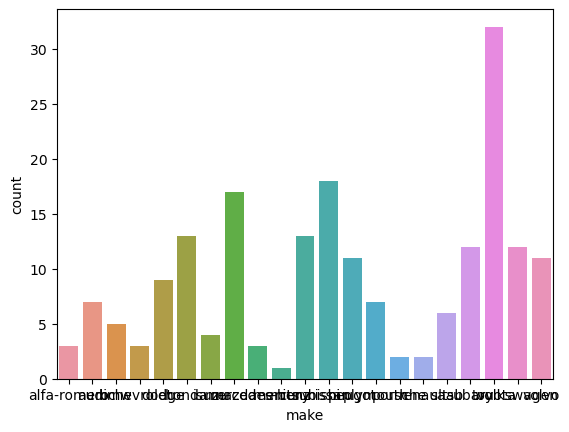

Name of column is : fuel-type


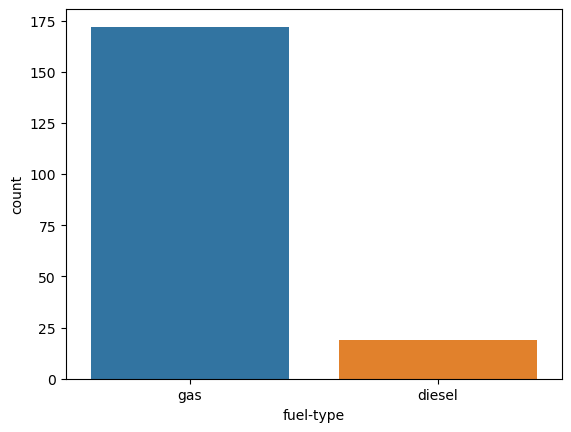

Name of column is : body-style


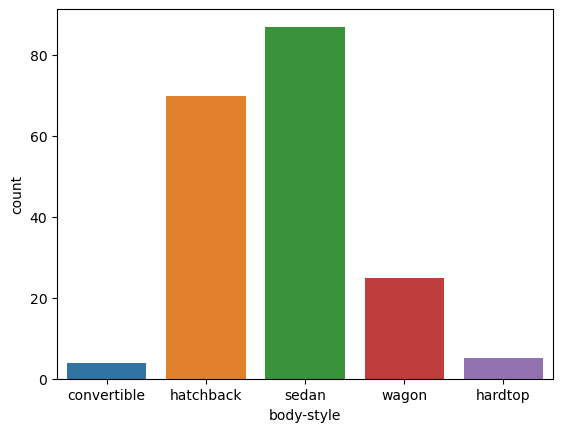

Name of column is : drive-wheels


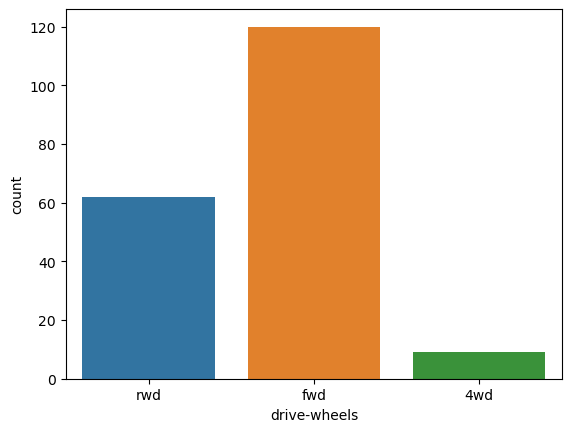

Name of column is : engine-location


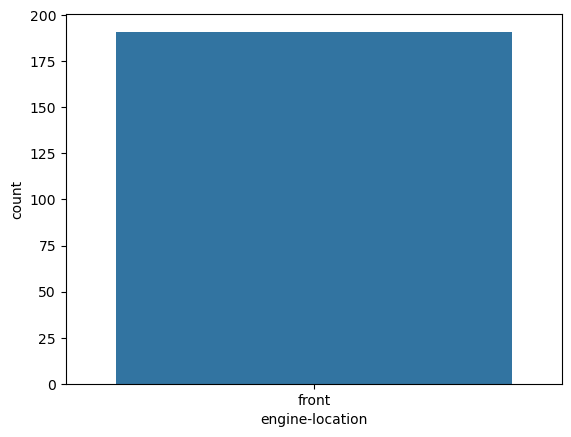

Name of column is : engine-type


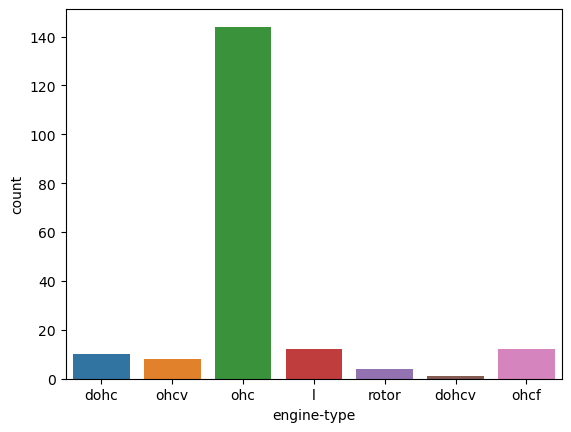

In [60]:
for colm in cat.columns:
    if cat[colm].dtypes == 'object':
        print(f"Name of column is : {colm}")
        sb.countplot(data=df,x=colm)
        plt.show()
        print('='*50)

In [61]:
#want to show top 5 make car countplot graph how it will achieve
top5_make = df['make'].value_counts().head(5).index
top5_make

Index(['toyota', 'nissan', 'mazda', 'mitsubishi', 'honda'], dtype='object', name='make')

In [62]:
#filtering data from actual df object
df_make = df[df['make'].isin(top5_make)]
df_make.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
27,2,137.0,honda,gas,hatchback,fwd,front,63.9,50.8,ohc,92,58.0,49,54,6479
28,2,137.0,honda,gas,hatchback,fwd,front,63.9,50.8,ohc,92,76.0,31,38,6855
29,1,101.0,honda,gas,hatchback,fwd,front,64.0,52.6,ohc,79,60.0,38,42,5399
30,1,101.0,honda,gas,hatchback,fwd,front,64.0,52.6,ohc,92,76.0,30,34,6529
31,1,101.0,honda,gas,hatchback,fwd,front,64.0,52.6,ohc,92,76.0,30,34,7129


# top 5 highest selling car

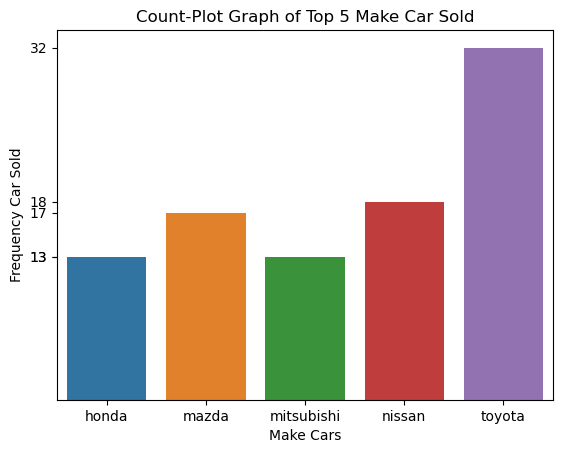

In [63]:
plt.title('Count-Plot Graph of Top 5 Make Car Sold')
sb.countplot(data=df_make,x='make')
plt.xlabel('Make Cars')
plt.ylabel('Frequency Car Sold')
f = df_make['make'].value_counts()
plt.yticks(f)
plt.show()

# top 3 lowest selling car

In [64]:
botm_3 = df['make'].value_counts().sort_values(ascending=True).head(3).index
botm_3

Index(['mercury', 'porsche', 'renault'], dtype='object', name='make')

In [65]:
#filtering the data from df object
df_bot_make = df[df['make'].isin(botm_3)]
df_bot_make

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
64,1,115.0,mercury,gas,hatchback,rwd,front,68.0,54.8,ohc,140,175.0,19,24,16503
114,3,186.0,porsche,gas,hatchback,rwd,front,68.3,50.2,ohc,151,143.0,19,27,22018
115,1,115.0,porsche,gas,hatchback,rwd,front,72.3,50.5,dohcv,203,288.0,17,28,12000
116,0,115.0,renault,gas,wagon,fwd,front,66.5,55.2,ohc,132,95.0,23,31,9295
117,2,115.0,renault,gas,hatchback,fwd,front,66.6,50.5,ohc,132,95.0,23,31,9895


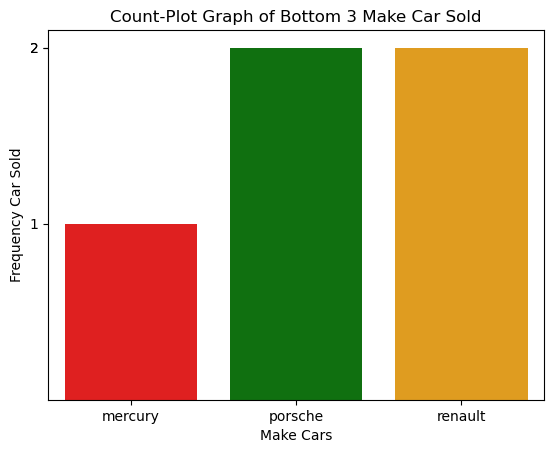

In [66]:
plt.title('Count-Plot Graph of Bottom 3 Make Car Sold')
sb.countplot(data=df_bot_make,x='make',palette=['red','green','orange'])
plt.xlabel('Make Cars')
plt.ylabel('Frequency Car Sold')
f = df_bot_make['make'].value_counts()
plt.yticks(f)
plt.show()

# pie top 5 highest selling car

In [67]:
#property of pie graph:--> pie graph is also a frequency graph
#this graph is generally suitable for object dtype column value ke liye!!! 

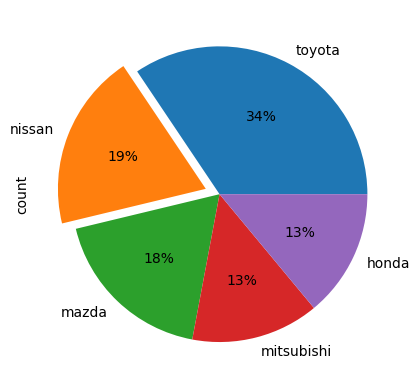

In [68]:
df['make'].value_counts().head(5).plot(kind='pie',autopct='%d%%',explode=(0, 0.1, 0, 0, 0))
plt.show()

# pie graph bottom 5 selling car

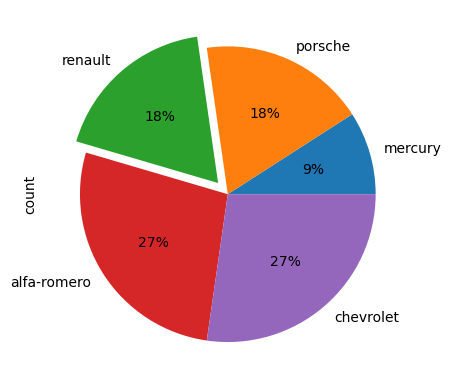

In [69]:
df['make'].value_counts().sort_values(ascending=True).head(5).plot(kind='pie',autopct='%d%%',explode=(0, 0, 0.1, 0, 0))
plt.show()

# Bar graph

In [70]:
#bar graph is a frequency graph
#this graph is generally  suitable for object dtype column value ke liye

In [71]:
cat.columns

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [72]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

# top 3 highest body_style selling car

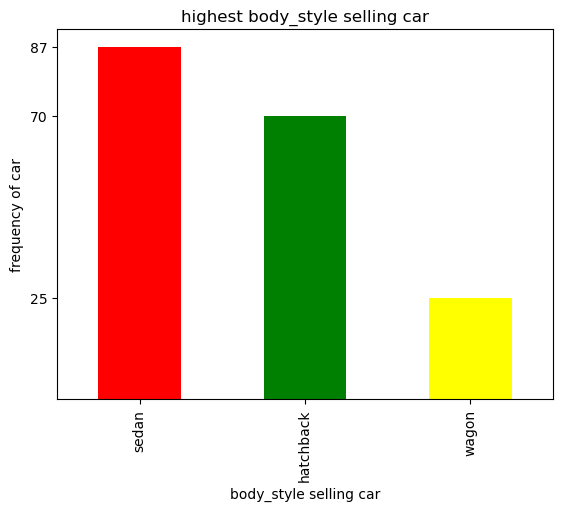

In [73]:
plt.title('highest body_style selling car')
df['body-style'].value_counts().head(3).plot(kind='bar',color=['red','green','yellow'])
f = df['body-style'].value_counts().head(3)
plt.xlabel('body_style selling car')
plt.ylabel('frequency of car')
plt.yticks(f)
plt.show()

# lowest body-style selling cars

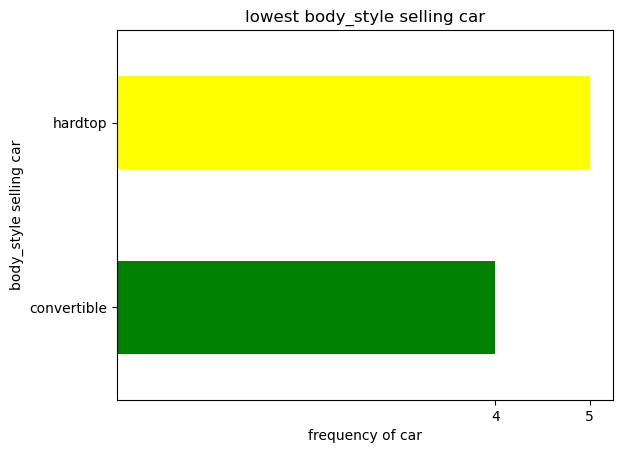

In [74]:
plt.title('lowest body_style selling car')
df['body-style'].value_counts().sort_values(ascending=True).head(2).plot(kind='barh',color=['green','yellow'])
f = df['body-style'].value_counts().sort_values(ascending=True).head(2)
plt.ylabel('body_style selling car')
plt.xlabel('frequency of car')
plt.xticks(f)
plt.show()

# if dtype of column is numeric then we plot histogram graph,scatterplot,distplot,pairplot

In [75]:
num = df.select_dtypes(exclude='object')
num.columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

# histplot

In [76]:
#it is also frequency graph 
#generally suitable for contineous numeric dtype column 

Column name is: symboling


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


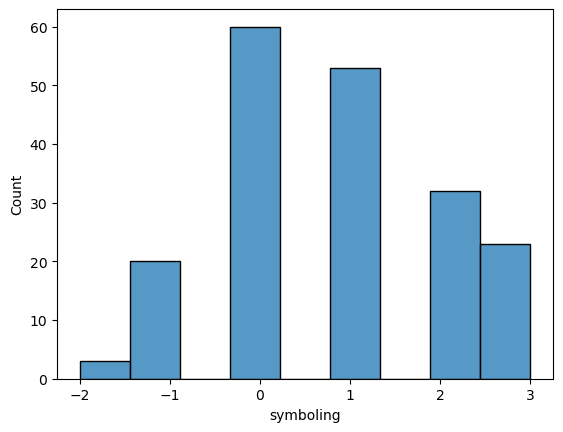

Column name is: normalized-losses


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


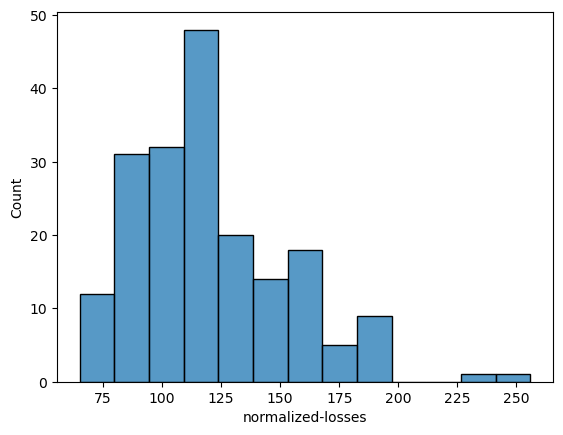

Column name is: width


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


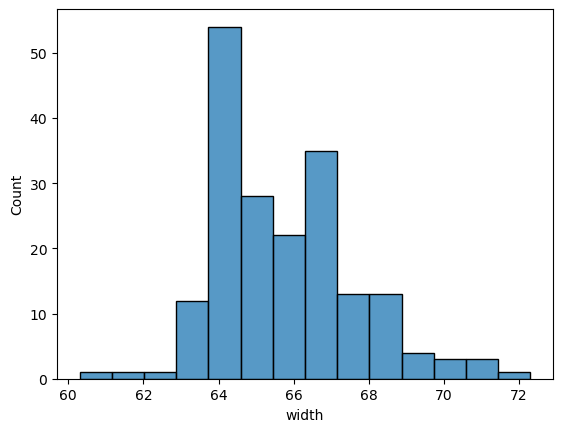

Column name is: height


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


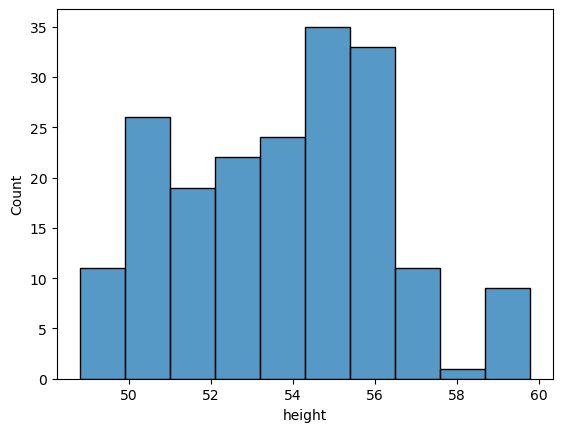

Column name is: engine-size


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


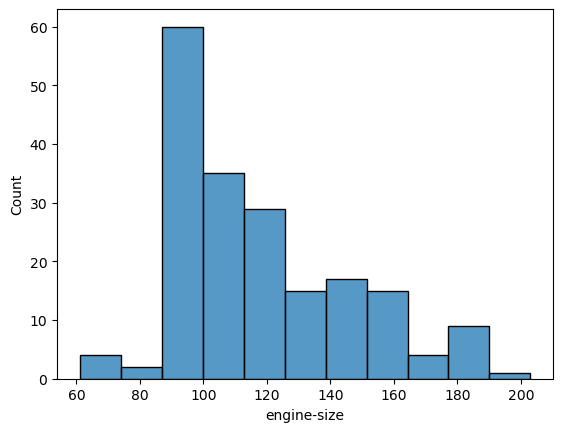

Column name is: horsepower


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


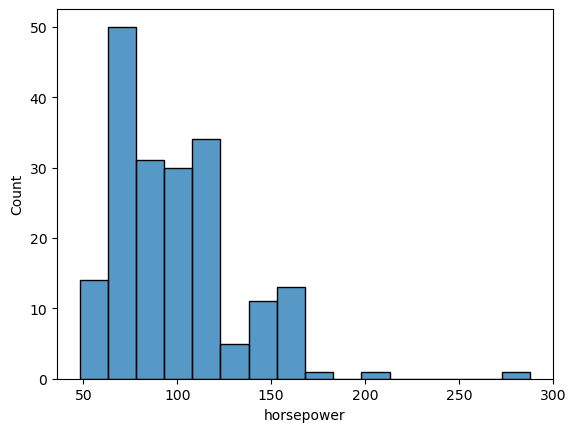

Column name is: city-mpg


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


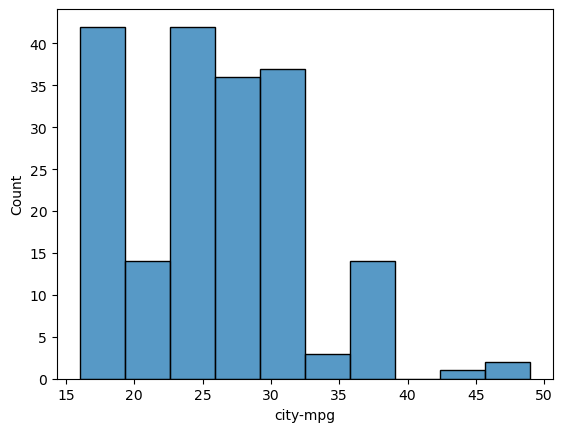

Column name is: highway-mpg


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


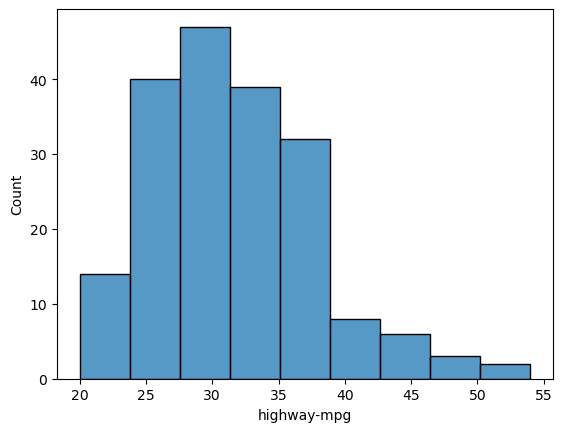

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Column name is: price


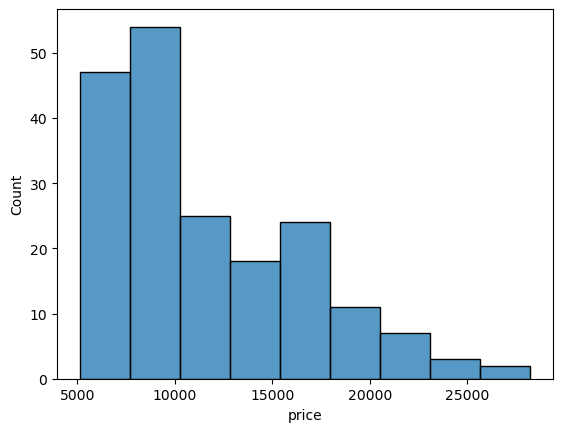

In [77]:
for i,v in enumerate(num.columns):
    if num[v].dtypes != 'object':
        print(f'Column name is: {v}')
        sb.histplot(data=num,x=v,)
        plt.show()
        print('='*50)

# top 3 highest milege manufacturing cars

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


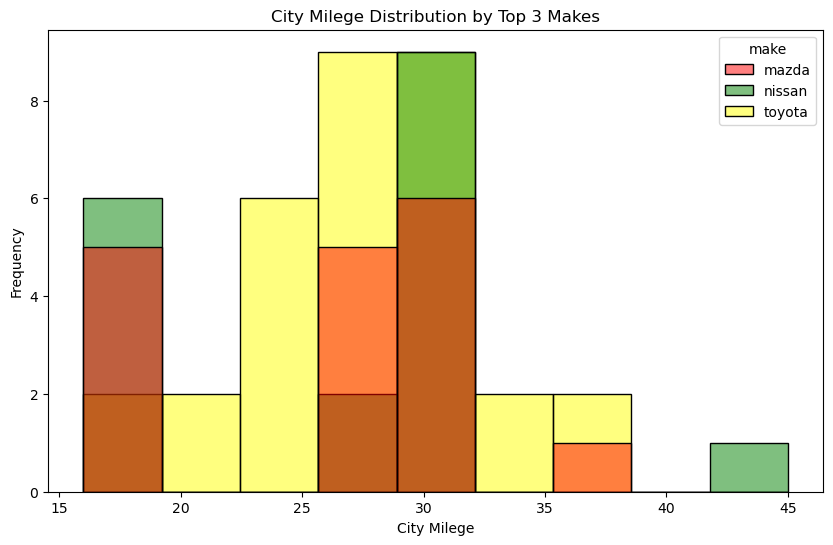

In [78]:
# Get the top 3 makes
top_3_makes = df['make'].value_counts().head(3).index

# Filter the DataFrame to include only the top 3 makes
df_top_3_makes = df[df['make'].isin(top_3_makes)]

# Plot the histogram with hue
plt.figure(figsize=(10, 6))
sb.histplot(data=df_top_3_makes, x='city-mpg', hue='make', palette=['red', 'green', 'yellow'])
plt.title('City Milege Distribution by Top 3 Makes')
plt.xlabel('City Milege')
plt.ylabel('Frequency')
plt.show()

# scatterplot graph 

In [79]:
#generally we used to find co-relationship btn 2 variable 
#and those relationship we r visualizing on scatterplot graph
#and it is suitable for contineous numeric dtype column
#scatterplot graph visualize only 2d graph

In [80]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

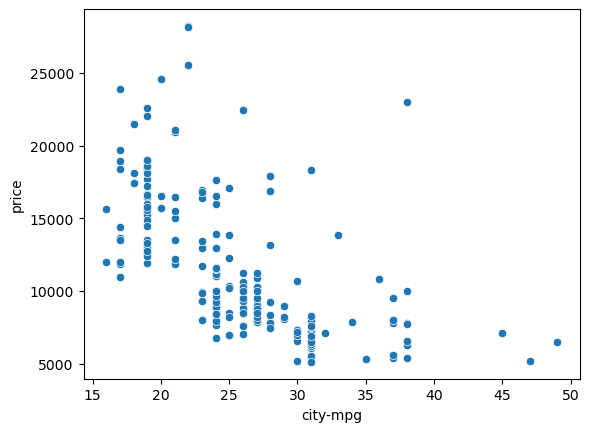

In [81]:
sb.scatterplot(data=df,x='city-mpg',y='price')
plt.show()

# pairplot

In [82]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

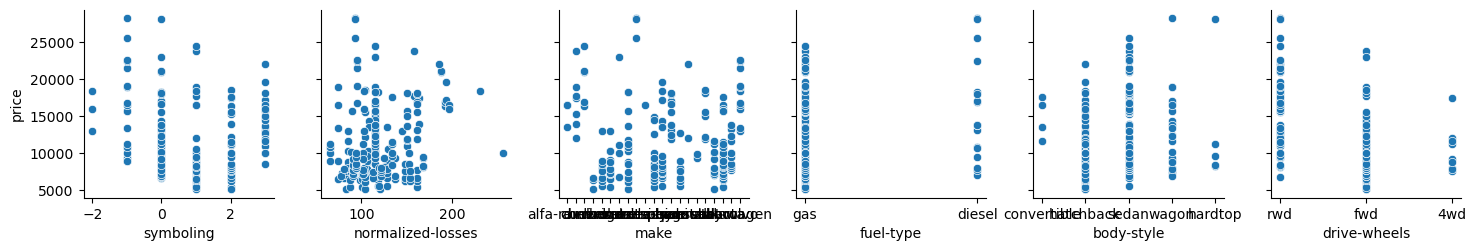

In [83]:
#pairplot genearlly we used to visualize 6d graph
sb.pairplot(data=df,x_vars=['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels'],y_vars='price')
plt.show()

# distplot graph

In [84]:
#it is also a frequency graph 
#generally suitable for contineous numeric dtype column value
#using distplot graph we can check skewness exist or not
#if skewness present in the any column of df object we can reduce skewness by doing transformation
#either by doing log or sqrt transformation of numpy library
#to rerduce skewness following condn has to satisfy
#a)no negative value must be present in the column
#b)if it bad correlated then only we reduce skewness from that column of df object

Column name is: symboling
skwness value of this symboling is: 0.1585952745626031


C:\Users\shaik\AppData\Local\Temp\ipykernel_5156\1594329243.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x = num[v],hist=False)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


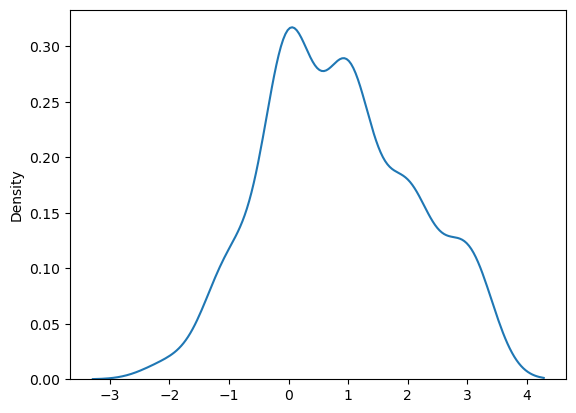

Column name is: normalized-losses
skwness value of this normalized-losses is: 0.9365505575980949


C:\Users\shaik\AppData\Local\Temp\ipykernel_5156\1594329243.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x = num[v],hist=False)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


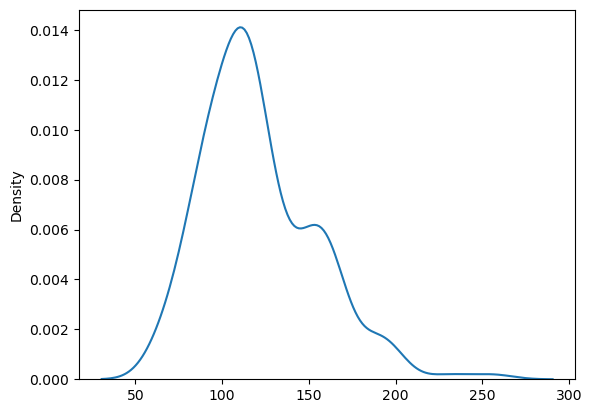

Column name is: width
skwness value of this width is: 0.8148863949164729


C:\Users\shaik\AppData\Local\Temp\ipykernel_5156\1594329243.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x = num[v],hist=False)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


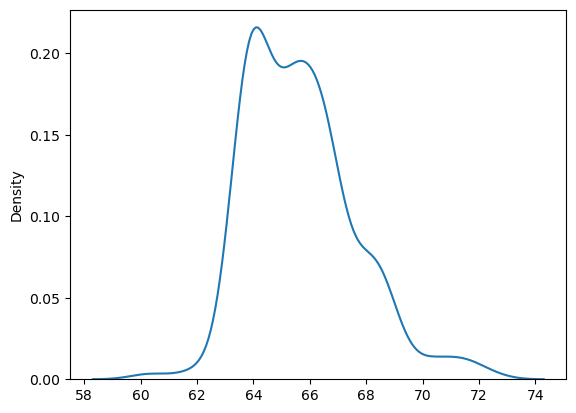

Column name is: height
skwness value of this height is: 0.11489353994073966


C:\Users\shaik\AppData\Local\Temp\ipykernel_5156\1594329243.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x = num[v],hist=False)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


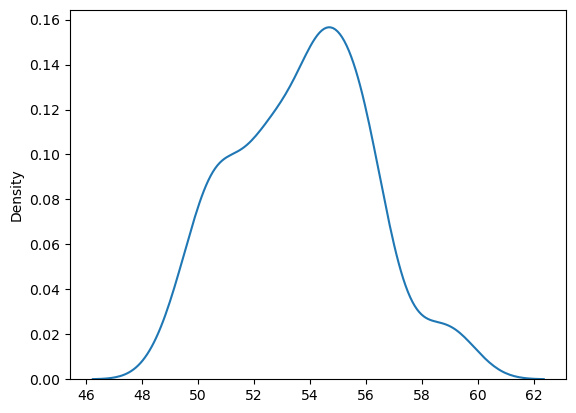

Column name is: engine-size
skwness value of this engine-size is: 0.740096109029573


C:\Users\shaik\AppData\Local\Temp\ipykernel_5156\1594329243.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x = num[v],hist=False)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


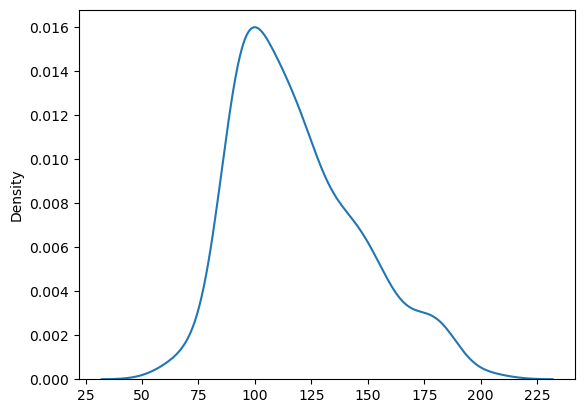

Column name is: horsepower
skwness value of this horsepower is: 1.5477936392897447


C:\Users\shaik\AppData\Local\Temp\ipykernel_5156\1594329243.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x = num[v],hist=False)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


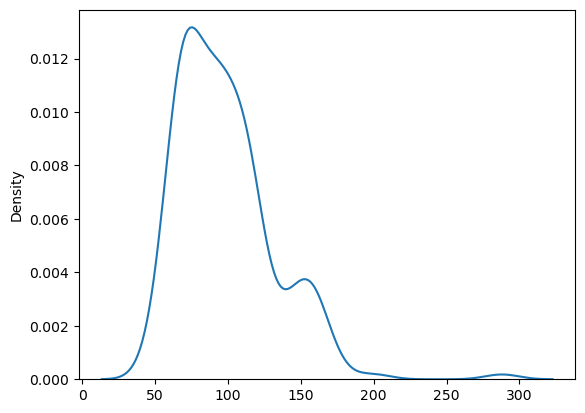

Column name is: city-mpg
skwness value of this city-mpg is: 0.7719331298717839


C:\Users\shaik\AppData\Local\Temp\ipykernel_5156\1594329243.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x = num[v],hist=False)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


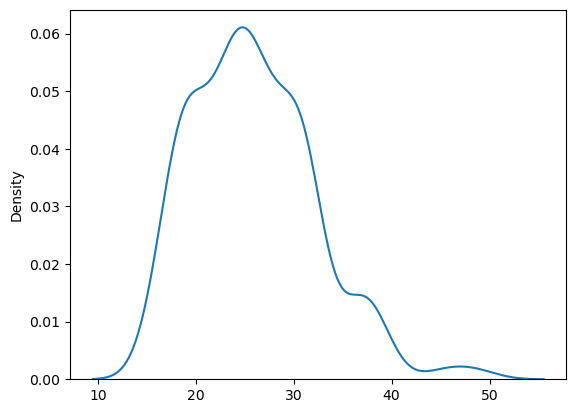

Column name is: highway-mpg
skwness value of this highway-mpg is: 0.7364281740531796


C:\Users\shaik\AppData\Local\Temp\ipykernel_5156\1594329243.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x = num[v],hist=False)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


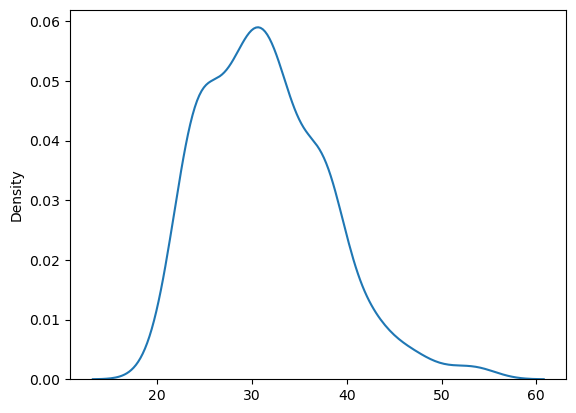

Column name is: price
skwness value of this price is: 1.0176661887138065


C:\Users\shaik\AppData\Local\Temp\ipykernel_5156\1594329243.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x = num[v],hist=False)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


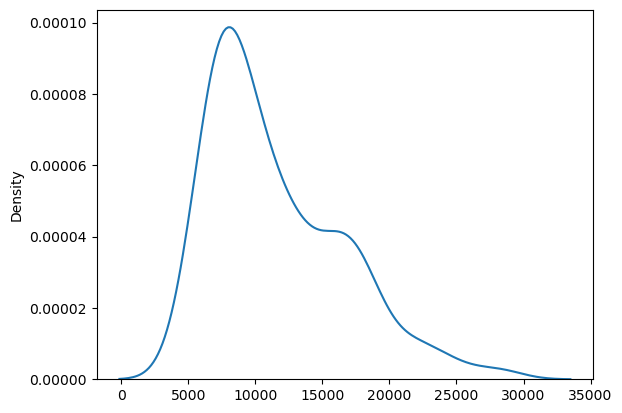

In [85]:
for i,v in enumerate(num.columns):
    if num[v].dtypes != 'object':
        print(f'Column name is: {v}')
        print(f'skwness value of this {v} is: {num[v].skew()}')
        sb.distplot(x = num[v],hist=False)
        plt.show()
        print('='*50)
        
#all are showing positive skewness exist in df object